In [11]:
import os
import zipfile
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import os
import re

In [9]:
source_dir = '../adni_data/CompressedData'
target_dir = '../adni_data/ADNI_flat'


# Ensure the target directory exists
os.makedirs(target_dir, exist_ok=True)

# Loop through all files in the source directory
for file_name in os.listdir(source_dir):
    # Check if the file is a zip file and starts with the specified prefix
    if file_name.startswith('ADNI1_Complete 1Yr 1.5T') and file_name.endswith('.zip'):
        file_path = os.path.join(source_dir, file_name)
        
        # Open the zip file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # Extract files without preserving directory structure
            for member in zip_ref.infolist():
                # Extract file with a flattened structure
                extracted_file_name = os.path.basename(member.filename)
                if extracted_file_name:  # Skip directories
                    extracted_path = os.path.join(target_dir, extracted_file_name)
                    with open(extracted_path, 'wb') as extracted_file:
                        extracted_file.write(zip_ref.read(member.filename))
        print(f'Flattened extraction of {file_name} into {target_dir}')

print("Extraction complete.")

Flattened extraction of ADNI1_Complete 1Yr 1.5T.zip into ../adni_data/CompressedData
Flattened extraction of ADNI1_Complete 1Yr 1.5T1.zip into ../adni_data/CompressedData
Flattened extraction of ADNI1_Complete 1Yr 1.5T2.zip into ../adni_data/CompressedData
Flattened extraction of ADNI1_Complete 1Yr 1.5T3.zip into ../adni_data/CompressedData
Flattened extraction of ADNI1_Complete 1Yr 1.5T4.zip into ../adni_data/CompressedData
Flattened extraction of ADNI1_Complete 1Yr 1.5T5.zip into ../adni_data/CompressedData
Flattened extraction of ADNI1_Complete 1Yr 1.5T6.zip into ../adni_data/CompressedData
Flattened extraction of ADNI1_Complete 1Yr 1.5T7.zip into ../adni_data/CompressedData
Flattened extraction of ADNI1_Complete 1Yr 1.5T8.zip into ../adni_data/CompressedData
Flattened extraction of ADNI1_Complete 1Yr 1.5T9.zip into ../adni_data/CompressedData
Extraction complete.


In [13]:
# Initialize a list to store file details
file_details = []
processed_dir = '../adni_data'

# Define a regex pattern to extract key parts of the filename
pattern = re.compile(
    r"ADNI_(\d+)_S_(\d+)_MR_(.+?)_Br_(\d+)_S(\d+)_I(\d+)\.nii"
)

# Loop through the directory and collect file details
for root, dirs, files in os.walk(processed_dir):
    for file_name in files:
        if file_name.endswith('.nii'):  # Check if it's an .nii file
            match = pattern.match(file_name)
            if match:
                subject_id, session_id, scan_type, date, series_id, image_id = match.groups()
                
                # Split the scan type into detailed components
                scan_details = scan_type.split('__')
                normalized_file_path = os.path.join(root, file_name).replace('\\', '/')
                
                file_details.append({
                    'Subject ID': subject_id,
                    'Session ID': session_id,
                    'Scan Type': scan_type.replace('__', '_'),  # Keep full scan type for reference
                    'Date': date,
                    'Series ID': series_id,
                    'Image ID': image_id,
                    **{f"Scan Detail {i+1}": part for i, part in enumerate(scan_details)},  # Add detailed parts
                    'File Path': normalized_file_path
                })
            else:
                print(f"File does not match expected structure: {file_name}")

# Convert the list to a DataFrame
summary_df = pd.DataFrame(file_details)

# Save or display the summary
summary_file = '../adni_data/ADNI_detailed_summary.csv'
summary_df.to_csv(summary_file, index=False)

print(f"Detailed summary created: {summary_file}")


Detailed summary created: ../adni_data/ADNI_detailed_summary.csv


In [14]:
summary_df.head

<bound method NDFrame.head of      Subject ID Session ID                               Scan Type  \
0           002       0295  MPR_GradWarp_B1_Correction_N3_Scaled_2   
1           002       0295  MPR_GradWarp_B1_Correction_N3_Scaled_2   
2           002       0295    MPR_GradWarp_B1_Correction_N3_Scaled   
3           002       0295    MPR_GradWarp_B1_Correction_N3_Scaled   
4           002       0295    MPR_GradWarp_B1_Correction_N3_Scaled   
...         ...        ...                                     ...   
2289        941       1202    MPR_GradWarp_B1_Correction_N3_Scaled   
2290        941       1202    MPR_GradWarp_B1_Correction_N3_Scaled   
2291        941       1311  MPR-R_GradWarp_B1_Correction_N3_Scaled   
2292        941       1311    MPR_GradWarp_B1_Correction_N3_Scaled   
2293        941       1311    MPR_GradWarp_B1_Correction_N3_Scaled   

                   Date Series ID Image ID Scan Detail 1 Scan Detail 2  \
0     20081001114556321     13408   118671           MP

In [15]:
# Path to the detailed summary CSV file
detailed_summary_file = '../adni_data/ADNI_detailed_summary.csv'

try:
    # Load the detailed summary file
    summary_df = pd.read_csv(detailed_summary_file)

    # Extract all detailed scan columns dynamically
    scan_details_columns = [col for col in summary_df.columns if col.startswith('Scan Detail')]
    
    # Create a summary of the detailed scan components
    scan_details_summary = summary_df[scan_details_columns].apply(lambda x: x.value_counts()).fillna(0)
    scan_details_summary = scan_details_summary.astype(int)  # Ensure integer values

    # Save the detailed scan components summary to a CSV
    scan_details_summary_file = '../adni_data/ADNI_scan_details_summary.csv'
    scan_details_summary.to_csv(scan_details_summary_file)

    # Print a preview of the summary
    print("Detailed Scan Components Summary:")
    print(scan_details_summary.head())
    print(f"\nScan details summary saved: {scan_details_summary_file}")

except FileNotFoundError:
    print(f"File {detailed_summary_file} not found. Please ensure the detailed extraction script has been run successfully.")


Detailed Scan Components Summary:
               Scan Detail 1  Scan Detail 2  Scan Detail 3  Scan Detail 4  \
B1_Correction              0              0           1654              0   
GradWarp                   0           1911              0              0   
MPR                     1836              0              0              0   
MPR-R                    458              0              0              0   
N3                         0              0            640           1654   

               Scan Detail 5  
B1_Correction              0  
GradWarp                   0  
MPR                        0  
MPR-R                      0  
N3                         0  

Scan details summary saved: ../adni_data/ADNI_scan_details_summary.csv


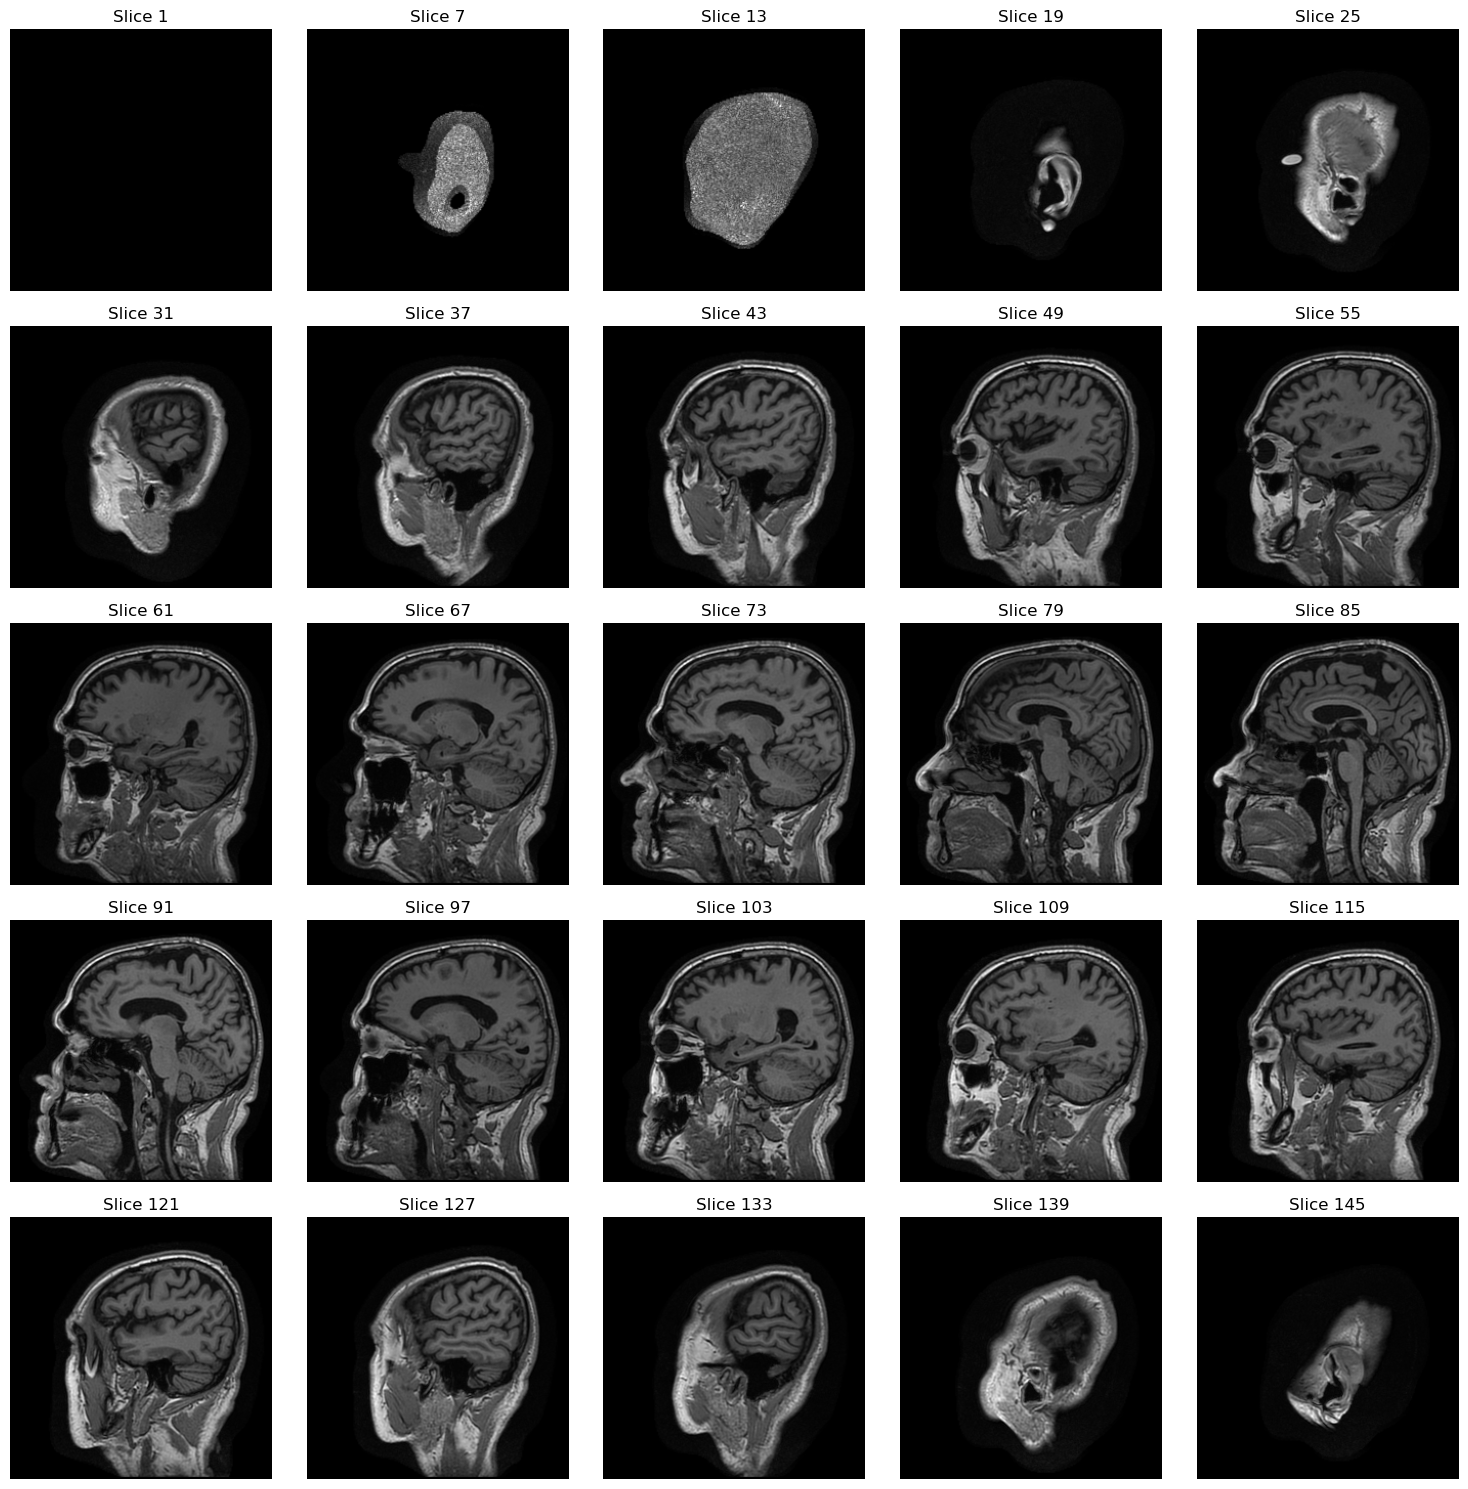

In [29]:
# Filter the first .nii file path from the 'File Path' column
first_nii_file = summary_df['File Path'].iloc[0]

# Load the .nii file
nii_data = nib.load(first_nii_file)

# Extract the image data as a numpy array
image_data = nii_data.get_fdata()

# Calculate slice indices with an interval of 5, up to 25 slices
z_slices = [i for i in range(1, 26 * 6, 6) if i < image_data.shape[2]]


# Set up a 5x5 grid for displaying the slices
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    slice_index = z_slices[i]
    # Extract the slice along the z-axis
    slice_data = image_data[:, :, slice_index]
    rotated_slice = np.rot90(slice_data, k=-1)
    ax.imshow(rotated_slice.T, cmap='gray', origin='lower')
    ax.set_title(f'Slice {slice_index}')
    ax.axis('off')

plt.tight_layout()
plt.show()



In [17]:
summary_df['File Path'][0]

'../adni_data/ADNI_flat/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001114556321_S13408_I118671.nii'

In [24]:
import nibabel as nib

# Path to the .nii file
nii_file = summary_df['File Path'].iloc[0]  # Replace with the path to your .nii file

# Load the .nii file
nii_data = nib.load(nii_file)

# Extract the image data as a numpy array
image_data = nii_data.get_fdata()

# Get the number of slices along the z-axis
num_slices = image_data.shape[2]

print(f"The file {nii_file} has {num_slices} slices along the z-axis.")


The file ../adni_data/ADNI_flat/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081001114556321_S13408_I118671.nii has 166 slices along the z-axis.


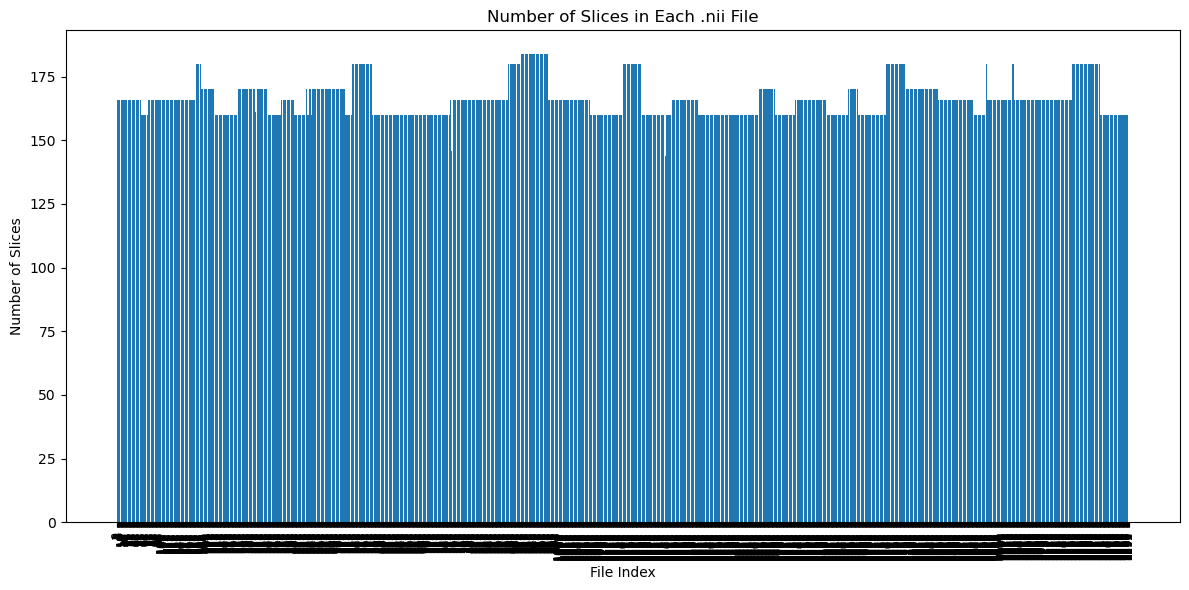

In [25]:
# Initialize a list to store the number of slices for each file
slice_counts = []

# Iterate over all .nii file paths in the DataFrame
for nii_file in summary_df['File Path']:
    try:
        # Load the .nii file
        nii_data = nib.load(nii_file)

        # Extract the image data and get the number of slices along the z-axis
        num_slices = nii_data.get_fdata().shape[2]
        slice_counts.append((nii_file, num_slices))
    except Exception as e:
        print(f"Error processing file {nii_file}: {e}")

# Create a DataFrame for visualization
slice_counts_df = pd.DataFrame(slice_counts, columns=['File Path', 'Number of Slices'])

# Plot the barchart
plt.figure(figsize=(12, 6))
plt.bar(range(len(slice_counts_df)), slice_counts_df['Number of Slices'], tick_label=range(len(slice_counts_df)))
plt.xlabel("File Index")
plt.ylabel("Number of Slices")
plt.title("Number of Slices in Each .nii File")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

plt.show()

In [26]:
slice_counts_df

File Path  Number of Slices
0     ../adni_data/ADNI_flat/ADNI_002_S_0295_MR_MPR_...               166
1     ../adni_data/ADNI_flat/ADNI_002_S_0295_MR_MPR_...               166
2     ../adni_data/ADNI_flat/ADNI_002_S_0295_MR_MPR_...               166
3     ../adni_data/ADNI_flat/ADNI_002_S_0295_MR_MPR_...               166
4     ../adni_data/ADNI_flat/ADNI_002_S_0295_MR_MPR_...               166
...                                                 ...               ...
2289  ../adni_data/ADNI_flat/ADNI_941_S_1202_MR_MPR_...               160
2290  ../adni_data/ADNI_flat/ADNI_941_S_1202_MR_MPR_...               160
2291  ../adni_data/ADNI_flat/ADNI_941_S_1311_MR_MPR-...               160
2292  ../adni_data/ADNI_flat/ADNI_941_S_1311_MR_MPR_...               160
2293  ../adni_data/ADNI_flat/ADNI_941_S_1311_MR_MPR_...               160

[2294 rows x 2 columns]

In [27]:
min(slice_counts_df['Number of Slices'])

124